# **Solusi Tugas 1: Image Enhancement in Spatial Domain**

Pengolahan Citra - Gasal 2021/2022

_Dikerjakan dengan Google Colab_


---

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from skimage import color, io, util, exposure, filters, morphology
from skimage.transform import rescale
from skimage.util import compare_images
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#@title Set Image Directory { vertical-output: true, display-mode: "form" }

# sesuaikan direktori jika ingin dijalankan
base_dir = 'drive/My Drive/Asdos/[Asdos] PC Ganjil 2021-2022/Lab/Lab 1/Citra Tugas Lab 1/'

# 1) Citra sunflower.jpg

## 1a) Original Image

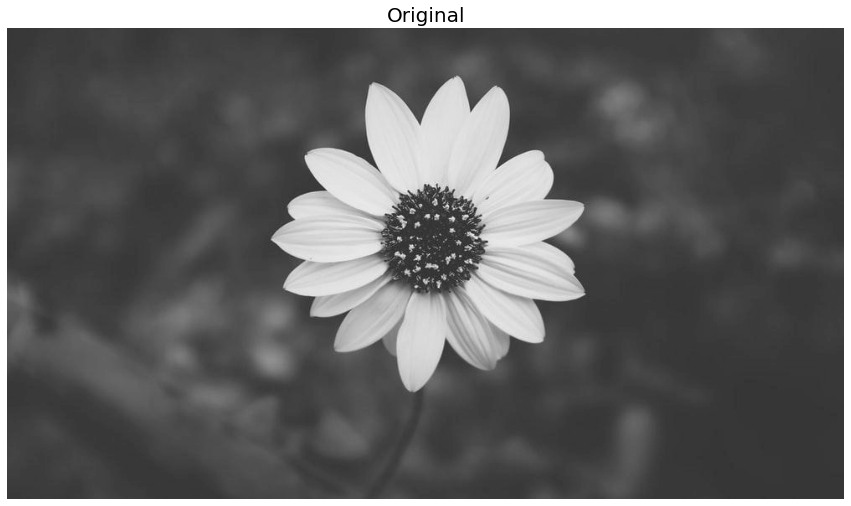

In [ ]:
image = io.imread(base_dir + 'sunflower.jpg')

plt.figure(figsize=(15, 15))
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Original', fontsize=20)
plt.axis('off')
plt.show()

## 1b) Histogram Equalization

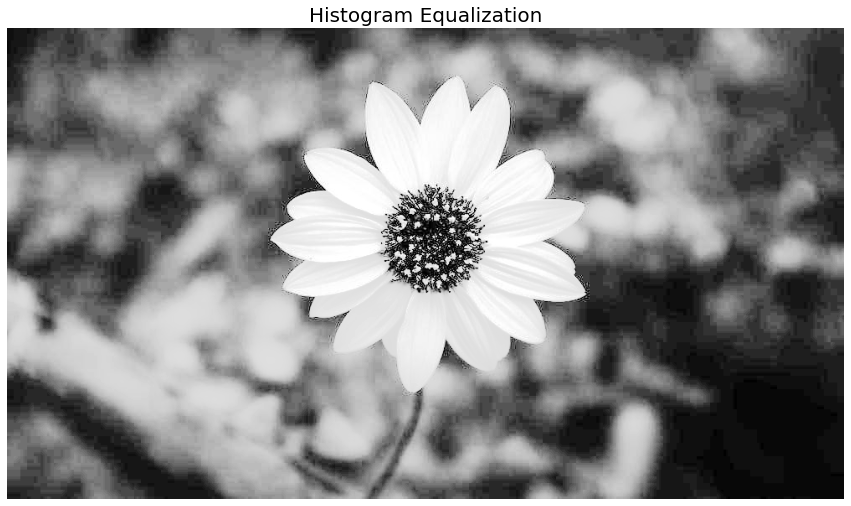

In [ ]:
eq_image = exposure.equalize_hist(image)*255

plt.figure(figsize=(15, 15))
plt.imshow(eq_image, cmap='gray')
plt.title('Histogram Equalization', fontsize=20)
plt.axis("off")
plt.show()

## 1c) Contrast Stretching

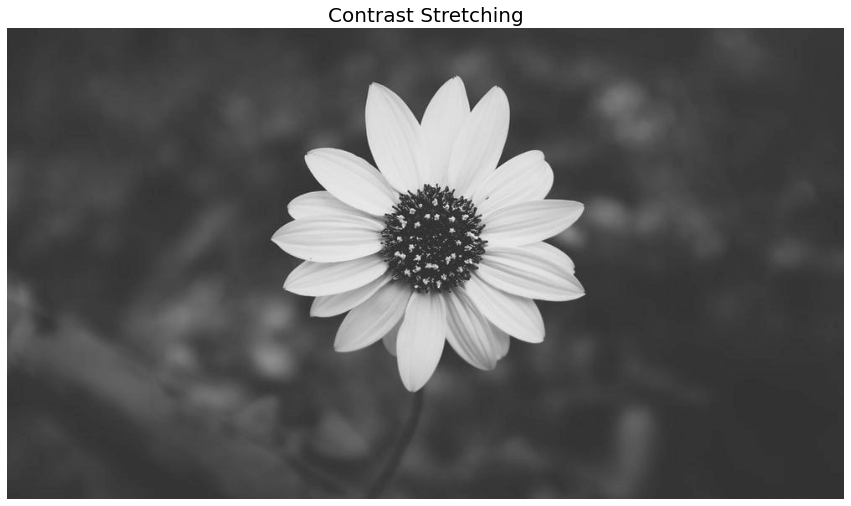

In [ ]:
gray = image
mn = min(gray.flatten())
mx = max(gray.flatten())
b = int(np.floor(255 / (mx - mn)))
image_cs = (gray - mn) * b

plt.figure(figsize=(15, 15))
plt.imshow(image_cs, cmap='gray')
plt.title('Contrast Stretching', fontsize=20)
plt.axis("off")
plt.show()

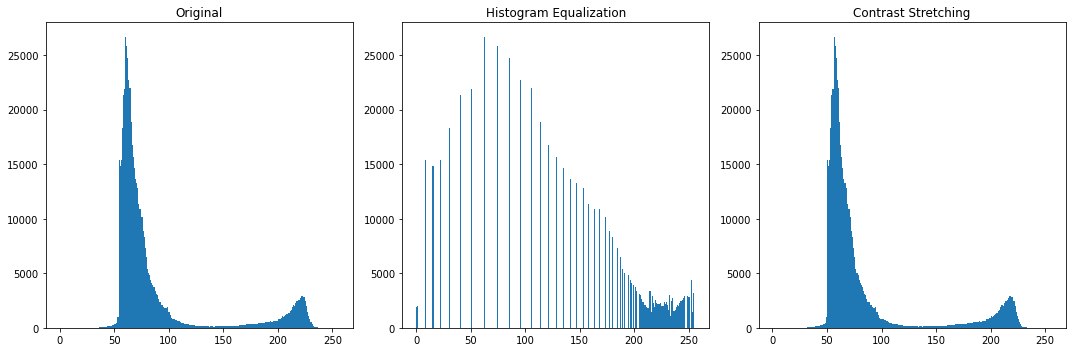

In [ ]:
# Perbandingan Histogram

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(image.flatten(), 256, range=(0,256))
plt.title('Original')

plt.subplot(1, 3, 2)
plt.hist(eq_image.flatten(), 256, range=(0,256))
plt.title('Histogram Equalization')

plt.subplot(1, 3, 3)
plt.hist(image_cs.flatten(), 256, range=(0,256))
plt.title('Contrast Stretching')

plt.tight_layout()
plt.show()

## 1d) Perbedaan HE dengan CS

Histogram Equalization  
    - Untuk meratakan persebaran nilai intensitas piksel  
    - Nilai intensitas yang baru bersesuaian dengan nilai peluang dari setiap kemunculan suatu nilai intensitas pada piksel  

Contrast Stretching  
    - Untuk mempersempit/memperlebar range intensitas sehingga bisa menurunkan/menaikkan kontras  
    - Nilai intensitas yang baru didapat dari perkalian nilai intensitas yang lama dengan
      perbandingan range intensitas maksimal (8 bit = 255) terhadap range intensitas citra

# 2) Citra iris.jpg

In [ ]:
image = io.imread(base_dir + 'iris.jpg')
gray = util.img_as_ubyte(color.rgb2gray(image))

## 2a) Horizontal edge

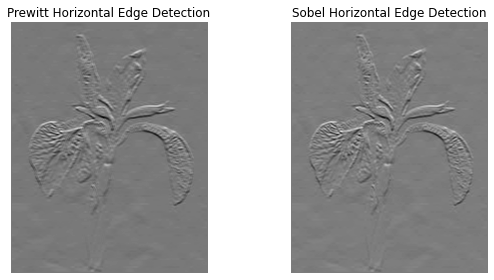

In [ ]:
edge_prewitt_h = filters.prewitt_h(gray)
edge_sobel_h = filters.sobel_h(gray)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

axes[0].imshow(edge_prewitt_h, cmap=plt.cm.gray)
axes[0].set_title('Prewitt Horizontal Edge Detection')

axes[1].imshow(edge_sobel_h, cmap=plt.cm.gray)
axes[1].set_title('Sobel Horizontal Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

## 2b) Vertical edge

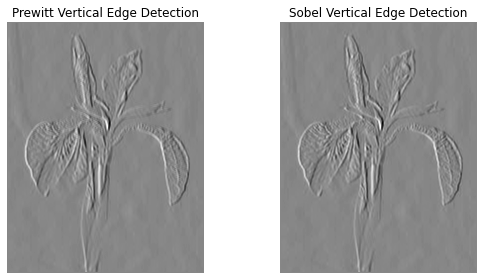

In [ ]:
edge_prewitt_v = filters.prewitt_v(gray)
edge_sobel_v = filters.sobel_v(gray)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

axes[0].imshow(edge_prewitt_v, cmap=plt.cm.gray)
axes[0].set_title('Prewitt Vertical Edge Detection')

axes[1].imshow(edge_sobel_v, cmap=plt.cm.gray)
axes[1].set_title('Sobel Vertical Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

## 2c) Full Edge

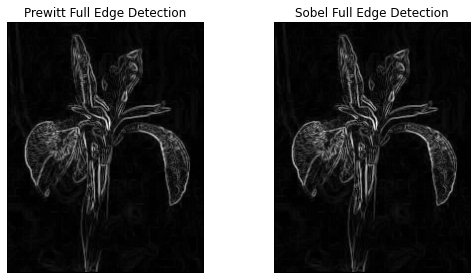

In [ ]:
edge_prewitt_full = np.sqrt(np.square(edge_prewitt_h) + np.square(edge_prewitt_v))
edge_prewitt_full *= 255.0 / edge_prewitt_full.max()

edge_sobel_full = np.sqrt(np.square(edge_sobel_h) + np.square(edge_sobel_v))
edge_sobel_full *= 255.0 / edge_sobel_full.max()

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(8, 4))

axes[0].imshow(edge_prewitt_full, cmap=plt.cm.gray)
axes[0].set_title('Prewitt Full Edge Detection')

axes[1].imshow(edge_sobel_full, cmap=plt.cm.gray)
axes[1].set_title('Sobel Full Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

Referensi:
http://www.adeveloperdiary.com/data-science/computer-vision/how-to-implement-sobel-edge-detection-using-python-from-scratch/

# 3) Citra starfish.png

In [ ]:
image = io.imread(base_dir + 'starfish.png')
gray = image

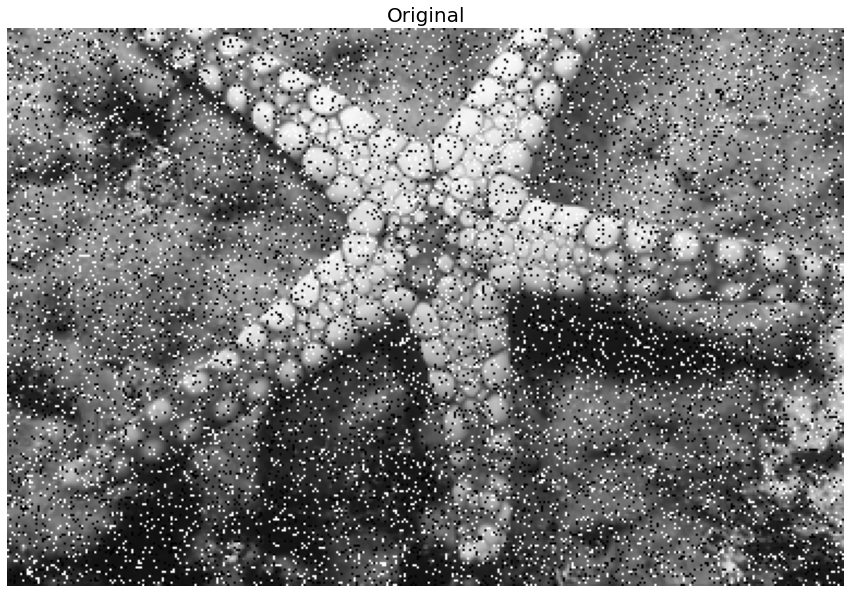

In [ ]:
# Original Image
plt.figure(figsize=(15, 15))
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title('Original', fontsize=20)
plt.axis('off')
plt.show()

## 3a) Median Filter

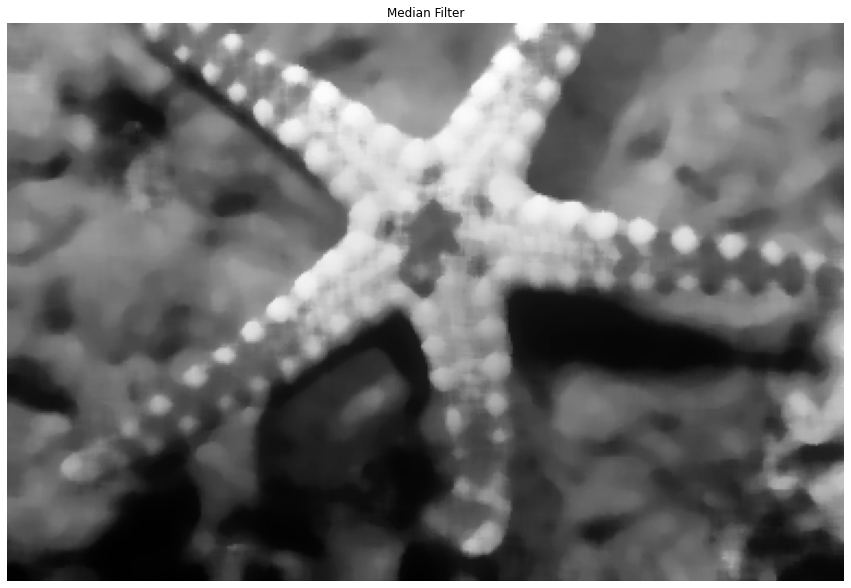

In [ ]:
median = filters.rank.median(util.img_as_ubyte(gray), selem=morphology.square(9))
plt.figure(figsize=(15, 15))
plt.imshow(median, cmap='gray')
plt.title('Median Filter')
plt.axis("off")
plt.show()

## 3b) Mean Filter

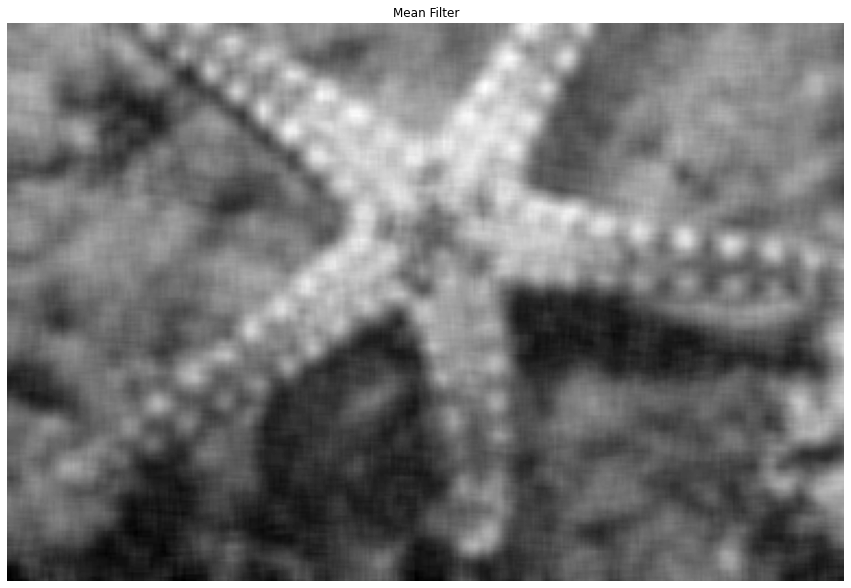

In [ ]:
mean = filters.rank.mean(util.img_as_ubyte(gray), selem=morphology.square(9))
plt.figure(figsize=(15, 15))
plt.imshow(mean, cmap='gray')
plt.title('Mean Filter')
plt.axis("off")
plt.show()

## 3c) Perbedaan Median dengan Mean Filter

Perbedaan yang dihasilkan pada citra 3a dan 3b terletak pada **banyaknya noise** yang berhasil dihilangkan dan **seberapa blur** citra yang dihasilkan.  

Berdasarkan hasil, dapat dikatakan filter yang lebih baik digunakan adalah median filter karena berhasil menghilangkan lebih banyak noise dan citra yang dihasilkan lebih jelas.